# Golam Saroare Shakil-011577991
# EconS 581 
# Homework 2

,Max,Mean,Min,Std_dev
living_area,5349.00000,1914.4288585,560,681.5401970
baths,7.00000,2.4623103,1,0.6789259
age,98.00000,11.3658964,0,15.0582137
fireplace,1.00000,0.8963083,0,0.3048641
garage_area,1724.00000,289.6319654,0,248.8732539
lakedist,67.44534,17.1906924,0,11.7879289


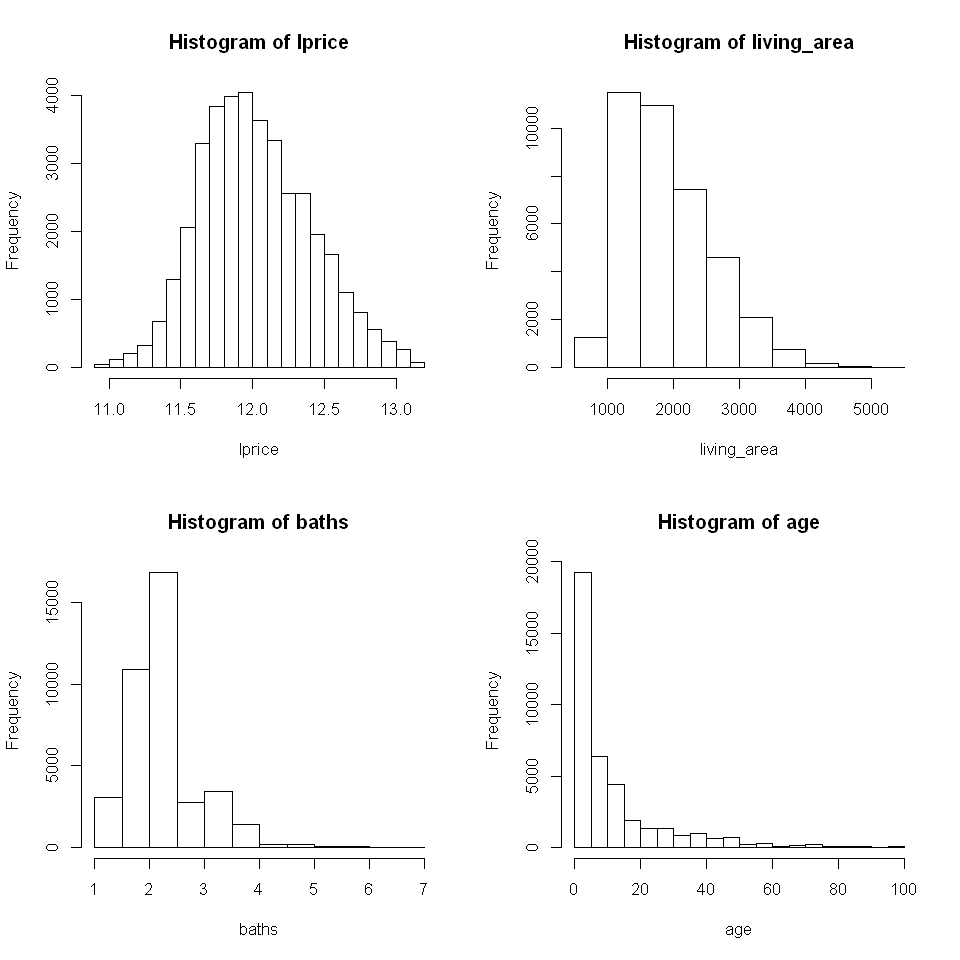

In [1]:
##Problem 18.1
dat<-read.csv("wake_exercise.csv",header=T)
names(dat)[1]<-"price"
attach(dat)
d<-dat[,c("living_area","baths","age","fireplace","garage_area","lakedist")]
summ1<-apply(d,2,max)
summ2<-apply(d,2,mean)
summ3<-apply(d,2,min)
summ4<-apply(d,2,sd)
d<-data.frame(summ1,summ2,summ3,summ4)
names(d)<-c("Max","Mean","Min","Std_dev")
d
par(mfrow=c(2,2))
options(repr.plot.width=8,repr.plot.height=8)
hist(lprice)
hist(living_area)
hist(baths)
hist(age)

,Estimates,Stdard_err,Critical t-value,p-value
intercept,1.065079e+01,1.762170e-02,604.413217,0.000000e+00
living_area,3.730434e-04,1.886370e-06,197.757238,0.000000e+00
baths,7.346504e-02,1.685580e-03,43.584440,0.000000e+00
age,2.524081e-03,7.454306e-05,33.860706,1.036325e-247
fireplace,9.592745e-02,3.034495e-03,31.612323,1.413904e-216
garage_area,2.984871e-04,4.954906e-06,60.240715,0.000000e+00
condA,5.462330e-01,1.735664e-02,31.471120,1.092016e-214
condB,2.663553e-01,1.715287e-02,15.528320,3.250374e-54
condC,1.160854e-01,1.781213e-02,6.517209,7.250344e-11


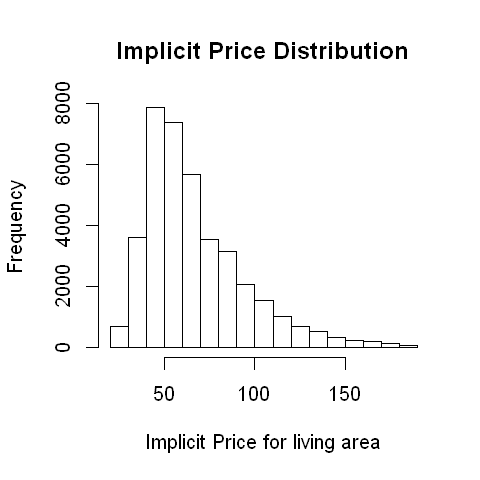

In [16]:
intercept<-rep(1,length(lprice))
x<-as.matrix(cbind(intercept,living_area,baths,age,fireplace,garage_area,condA,condB,condC))
y<-lprice
beta<-solve(t(x)%*%x)%*%(t(x)%*%y)
res<-y-x%*%beta
s2hat<-as.numeric((t(res)%*%res)/(length(res)-dim(x)[2]))
cov.mat<-s2hat[1]*solve(t(x)%*%x)
std.err<-sqrt(diag(cov.mat))
tval<-beta/std.err
names(tval)="tval"
pval<-2*pt(-abs(tval),length(res)-dim(x)[2])
summ.mod<-data.frame(cbind(beta,std.err,tval,pval))
names(summ.mod)<-c("Estimates","Stdard_err","Critical t-value","p-value")
summ.mod
imp_pr<-beta[2]*price
options(repr.plot.width=4,repr.plot.height=4)
hist(imp_pr,main="Implicit Price Distribution",xlab="Implicit Price for living area")

# Interpretation
We can observe from the table above that all the independent variables has a positive effect on log-price and independent varibales included in the model are highly statistically significant. However, the effecst are small and that raises the question whether these are economically significant or not. The distribution of implicit price suggests that households who are pricing between 40 to 70 have the fighest frequency.  

In [17]:
##Problem 18.2
log.lakedist=c()
for (i in 1:length(lprice)){
    if(lakedist[i]<=1)lakedist[i]=1
    }
log.lakedist<-log(lakedist)
x1<-as.matrix(cbind(intercept,living_area,baths,age,fireplace,garage_area,condA,condB,condC,lakedist,log.lakedist))
y<-lprice
beta<-solve(t(x1)%*%x1)%*%(t(x1)%*%y)
res<-y-x1%*%beta
s2hat<-as.numeric((t(res)%*%res)/(length(res)-dim(x1)[2]))
cov.mat<-s2hat[1]*solve(t(x1)%*%x1)
std.err<-sqrt(diag(cov.mat))
tval<-beta/std.err
names(tval)="tval"
pval<-2*pt(-abs(tval),length(res)-dim(x1)[2])
summ.mod<-data.frame(cbind(beta,std.err,tval,pval))
names(summ.mod)<-c("Estimates","Stdard_err","Critical t-value","p-value")
summ.mod
imp_pr1<-mean(beta[10]*price)+beta[11]*mean((price/lakedist))
print(paste0("Marginal WTP for lake access= ",imp_pr1))

,Estimates,Stdard_err,Critical t-value,p-value
intercept,10.7036903714,1.813214e-02,590.315802,0.000000e+00
living_area,0.0003701144,1.880580e-06,196.808629,0.000000e+00
baths,0.0697478305,1.688257e-03,41.313526,0.000000e+00
age,0.0023340961,7.463790e-05,31.272263,4.823521e-212
fireplace,0.0953798307,3.016372e-03,31.620713,1.091805e-216
garage_area,0.0003041127,4.934516e-06,61.629682,0.000000e+00
condA,0.5409851874,1.725414e-02,31.353944,3.970560e-213
condB,0.2588211927,1.705337e-02,15.177127,7.066627e-52
condC,0.1155244495,1.770531e-02,6.524846,6.890759e-11
lakedist,-0.0015124057,1.629576e-04,-9.280975,1.763391e-20


[1] "Marginal WTP for lake access= -304.386506278273"


Here, first we replaced  the value of all the values of lakedist less than or equal 1 with 1.  From the table we can see that the "Lakedist" is highly significant and log-lakedist is not significant at $5\%$ lavel of significance. Therefore, the functional form of distance doesn't seem to be important. For our specification the marginal WTP: $ \frac{\partial Price_{i}}{\partial distance_{i}}=\beta_{9}Price_{i}+\beta_{10}\frac{Price_{i}}{distance_{i}}$ which is estimated as -304.39.

In [18]:
x2<-as.matrix(cbind(intercept,living_area,baths,age,fireplace,garage_area,lakedist,log.lakedist))
y<-lprice
beta<-solve(t(x2)%*%x2)%*%(t(x2)%*%y)
res<-y-x2%*%beta
s2hat<-as.numeric((t(res)%*%res)/(length(res)-dim(x2)[2]))
cov.mat<-s2hat[1]*solve(t(x2)%*%x2)
std.err<-sqrt(diag(cov.mat))
tval<-beta/std.err
names(tval)="tval"
pval<-2*pt(-abs(tval),length(res)-dim(x2)[2])
summ.mod<-data.frame(cbind(beta,std.err,tval,pval))
names(summ.mod)<-c("Estimates","Stdard_err","Critical t-value","p-value")
summ.mod
imp_pr2<-mean(beta[07]*price)+mean(beta[08]*(price/lakedist))
print(paste0("Marginal WTP for lake access= ",imp_pr2))

,Estimates,Stdard_err,Critical t-value,p-value
intercept,10.9171767410,6.713799e-03,1626.0804781,0.000000e+00
living_area,0.0003784248,2.022721e-06,187.0869643,0.000000e+00
baths,0.0739863042,1.818053e-03,40.6953574,0.000000e+00
age,0.0039820489,7.108383e-05,56.0190556,0.000000e+00
fireplace,0.1062300557,3.241919e-03,32.7676429,2.535478e-232
garage_area,0.0002943397,5.318510e-06,55.3425087,0.000000e+00
lakedist,-0.0017874287,1.755953e-04,-10.1792490,2.633418e-24
log.lakedist,0.0023774703,2.630992e-03,0.9036401,3.661919e-01


[1] "Marginal WTP for lake access= -272.302060797607"


As we can see that, the implicit price increased significantly under this specification. It is because of the fact that if there is no incentive, e.g. school, employment or other spatial advantage, then there is a greater implicit price for living close to a lake access for living away from lake access.

In [20]:
x3<-as.matrix(cbind(intercept,living_area,baths,age,fireplace,garage_area,condA,condB,condC,lakedist,
                    log.lakedist,median_commute))
y<-lprice
beta<-solve(t(x3)%*%x3)%*%(t(x3)%*%y)
res<-y-x3%*%beta
s2hat<-as.numeric((t(res)%*%res)/(length(res)-dim(x3)[2]))
cov.mat<-s2hat[1]*solve(t(x3)%*%x3)
std.err<-sqrt(diag(cov.mat))
tval<-beta/std.err
names(tval)="tval"
pval<-2*pt(-abs(tval),length(res)-dim(x3)[2])
summ.mod<-data.frame(cbind(beta,std.err,tval,pval))
names(summ.mod)<-c("Estimates","Stdard_err","Critical t-value","p-value")
summ.mod
imp_pr3<-mean(beta[10]*price)+mean(beta[11]*(price/lakedist))
print(paste0("Implicit price for lake access= ",imp_pr3))

,Estimates,Stdard_err,Critical t-value,p-value
intercept,10.6184270640,1.815587e-02,584.848200,0.000000e+00
living_area,0.0003697852,1.859511e-06,198.861558,0.000000e+00
baths,0.0697200931,1.669313e-03,41.765750,0.000000e+00
age,0.0014252077,7.986267e-05,17.845730,6.000107e-71
fireplace,0.0955918472,2.982533e-03,32.050556,1.740865e-222
garage_area,0.0003083265,4.881196e-06,63.166167,0.000000e+00
condA,0.4925413333,1.713791e-02,28.739874,9.340238e-180
condB,0.2398514462,1.687404e-02,14.214226,9.743039e-46
condC,0.1104432860,1.750747e-02,6.308352,2.850571e-10
lakedist,-0.0008053094,1.628693e-04,-4.944515,7.665195e-07


[1] "Implicit price for lake access= -225.203875385696"


Adding the median_commute variable into the model, the implicit price increases which is surprising as adding more variables into the model could've decreased the weight it puts on the determination of price.   

In [21]:
x4<-as.matrix(cbind(intercept,living_area,baths,age,fireplace,garage_area,condA,condB,condC,lakedist,log.lakedist,
                    median_commute,zone1,zone2,zone3,zone4,zone5,zone6,zone7,zone8,zone9,zone10,zone11,zone12,zone13,
                    zone14,zone15,zone16,zone17,zone18))
y<-lprice
beta<-solve(t(x4)%*%x4)%*%(t(x4)%*%y)
res<-y-x4%*%beta
s2hat<-as.numeric((t(res)%*%res)/(length(res)-dim(x4)[2]))
cov.mat<-s2hat[1]*solve(t(x4)%*%x4)
std.err<-sqrt(diag(cov.mat))
tval<-beta/std.err
names(tval)="tval"
pval<-2*pt(-abs(tval),length(res)-dim(x4)[2])
summ.mod<-data.frame(cbind(beta,std.err,tval,pval))
names(summ.mod)<-c("Estimates","Stdard_err","Critical t-value","p-value")
summ.mod
imp_pr4<-mean(beta[10]*price)+mean(beta[11]*(price/lakedist))
print(paste0("Implicit price for lake access= ",imp_pr4))

,Estimates,Stdard_err,Critical t-value,p-value
intercept,10.8530680316,1.695021e-02,640.2911914,0.000000e+00
living_area,0.0003471583,1.721801e-06,201.6251104,0.000000e+00
baths,0.0626320260,1.524372e-03,41.0871133,0.000000e+00
age,-0.0003410053,7.694793e-05,-4.4316364,9.377665e-06
fireplace,0.0605583287,2.720061e-03,22.2635902,4.030293e-109
garage_area,0.0002770006,4.449123e-06,62.2595899,0.000000e+00
condA,0.3249225978,1.559455e-02,20.8356498,6.907293e-96
condB,0.1796831430,1.514006e-02,11.8680609,1.973951e-32
condC,0.0911120370,1.568567e-02,5.8086168,6.348196e-09
lakedist,-0.0009250175,1.613781e-04,-5.7319878,9.999488e-09


[1] "Implicit price for lake access= -318.003404896892"


Adding spatial fixed effects into the model decreases the implicit price for lake access to -318. This is because, as the spatial effects comes into terms, the implicit price for distance from lake gets less weight for determinig the price.

In [22]:
tr_dist<-c()
for (i in 1:length(y)){
    tr_dist[i]<-max(1-(lakedist[i]/10)^0.5,0)}
x5<-as.matrix(cbind(intercept,living_area,baths,age,fireplace,garage_area,condA,condB,condC,lakedist,tr_dist,median_commute,
                    zone1,zone2,zone3,zone4,zone5,zone6,zone7,zone8,zone9,zone10,zone11,zone12,zone13,
                    zone14,zone15,zone16,zone17,zone18))
y<-lprice
beta<-solve(t(x5)%*%x5)%*%(t(x5)%*%y)
res<-y-x5%*%beta
s2hat<-as.numeric((t(res)%*%res)/(length(res)-dim(x5)[2]))
cov.mat<-s2hat[1]*solve(t(x5)%*%x5)
std.err<-sqrt(diag(cov.mat))
tval<-beta/std.err
names(tval)="tval"
pval<-2*pt(-abs(tval),length(res)-dim(x5)[2])
summ.mod<-data.frame(cbind(beta,std.err,tval,pval))
names(summ.mod)<-c("Estimates","Stdard_err","Critical t-value","p-value")
summ.mod

,Estimates,Stdard_err,Critical t-value,p-value
intercept,10.8358151957,1.659372e-02,653.00718106,0.000000e+00
living_area,0.0003470991,1.721298e-06,201.64957756,0.000000e+00
baths,0.0625642862,1.523126e-03,41.07624145,0.000000e+00
age,-0.0003420749,7.693330e-05,-4.44638298,8.757032e-06
fireplace,0.0606599754,2.719690e-03,22.30400385,1.653460e-109
garage_area,0.0002767109,4.449269e-06,62.19243737,0.000000e+00
condA,0.3251114893,1.559239e-02,20.85065792,5.065823e-96
condB,0.1797490673,1.513781e-02,11.87417527,1.835302e-32
condC,0.0910854309,1.568344e-02,5.80774569,6.381275e-09
lakedist,-0.0011468380,9.477545e-05,-12.10058113,1.205912e-33


In [15]:
imp_p5<-c()
for (i in 1:length(y)){
    if (tr_dist[i]==0)imp_p5[i]=price[i]*beta[10]
    else imp_p5[i]=price[i]*beta[10]-((price[i]*beta[10])/(2*sqrt(10)*sqrt(lakedist[i])))
}
imp_pr5<-mean(imp_p5)
print(paste0("Implicit price for lake access= ",imp_pr5))

[1] "Implicit price for lake access= -241.820848000303"


However, the non-linear transformation actually tries to rectify the intensity of spatial effect in determinig the price. It shows that although the implicit price of distance from lake decreases when we add spatial effects, the intensity of that decline is a lot smaller in the case of non-linear transformation than the case of log-transformation. 